In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pandas as pd
import seaborn as sns
import os
import sys
import logging
from pathlib import Path

# Set up file paths
file_path = str(Path().absolute())
project_path = str(Path().absolute().parent.parent)
exp_name = file_path.split('/')[-1]

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logging.info(f"Current file directory: {file_path}")
logging.info(f"Current project directory: {project_path}")

# Set plotting style
sns.set_context('paper', font_scale=2, rc={'lines.linewidth': 2})
sns.set_palette('colorblind')
sns.set_style('white')

# Set color palette and style
color_palette = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
sns.set_palette(color_palette)

2023-07-27 14:34:16,111 - INFO - Current file directory: /Users/septentrionalem/Desktop/study/thesis_2023_travelling_waves/exp/spectral-analysis
2023-07-27 14:34:16,113 - INFO - Current project directory: /Users/septentrionalem/Desktop/study/thesis_2023_travelling_waves


In [4]:
w12_18_path = '/Users/septentrionalem/Desktop/study/thesis_2023_travelling_waves/res/spectral-analysis/w12_07.spont/spectral_properties_w12_07.spont.csv'
w12_18 = pd.read_csv(w12_18_path)
w12_07_path = '/Users/septentrionalem/Desktop/study/thesis_2023_travelling_waves/res/spectral-analysis/w12_18.spont/spectral_properties_w12_18.spont.csv'
w12_07 = pd.read_csv(w12_07_path)

w12_18['Experiment'] = 'w12_18'
w12_07['Experiment'] = 'w12_07'

df = pd.concat([w12_18, w12_07])
print(df.head())

  Name of probe  Interval id    State  Channel  Depth   Alpha power  \
0          ECoG           11  upstate        0      0  8.907372e-11   
1          ECoG           16  upstate        0      0  6.056464e-10   
2          ECoG           18  upstate        0      0  2.230156e-10   
3          ECoG           21  upstate        0      0  6.420621e-10   
4          ECoG           26  upstate        0      0  6.544250e-10   

     Beta power   Gamma power   Total power  Central frequencies  Peak powers  \
0  1.129574e-11  1.040130e-12  2.339370e-09            71.143407     1.548299   
1  1.660374e-10  3.181459e-11  5.687002e-09            29.645649     1.400072   
2  6.174814e-11  1.005299e-11  3.615472e-09            28.023891     1.534959   
3  5.591660e-11  4.072618e-12  3.901521e-09             8.246017     1.560545   
4  1.047639e-10  2.013350e-11  6.701945e-09            29.851560     1.586244   

   Bandwidths                             Power spectrum (freqs)  \
0   12.000000  [  

<AxesSubplot: xlabel='Total power', ylabel='Depth'>

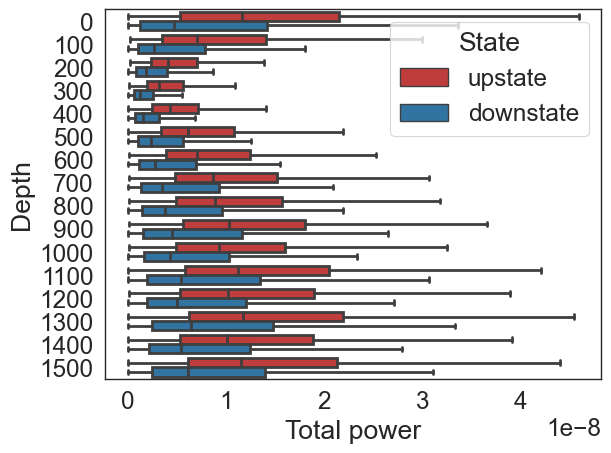

In [5]:
# plot vertical violinplot with depth on y-axis, total power on x-axis; split for state
# fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x='Total power', y='Depth', hue='State', data=df, orient='h', showfliers=False)


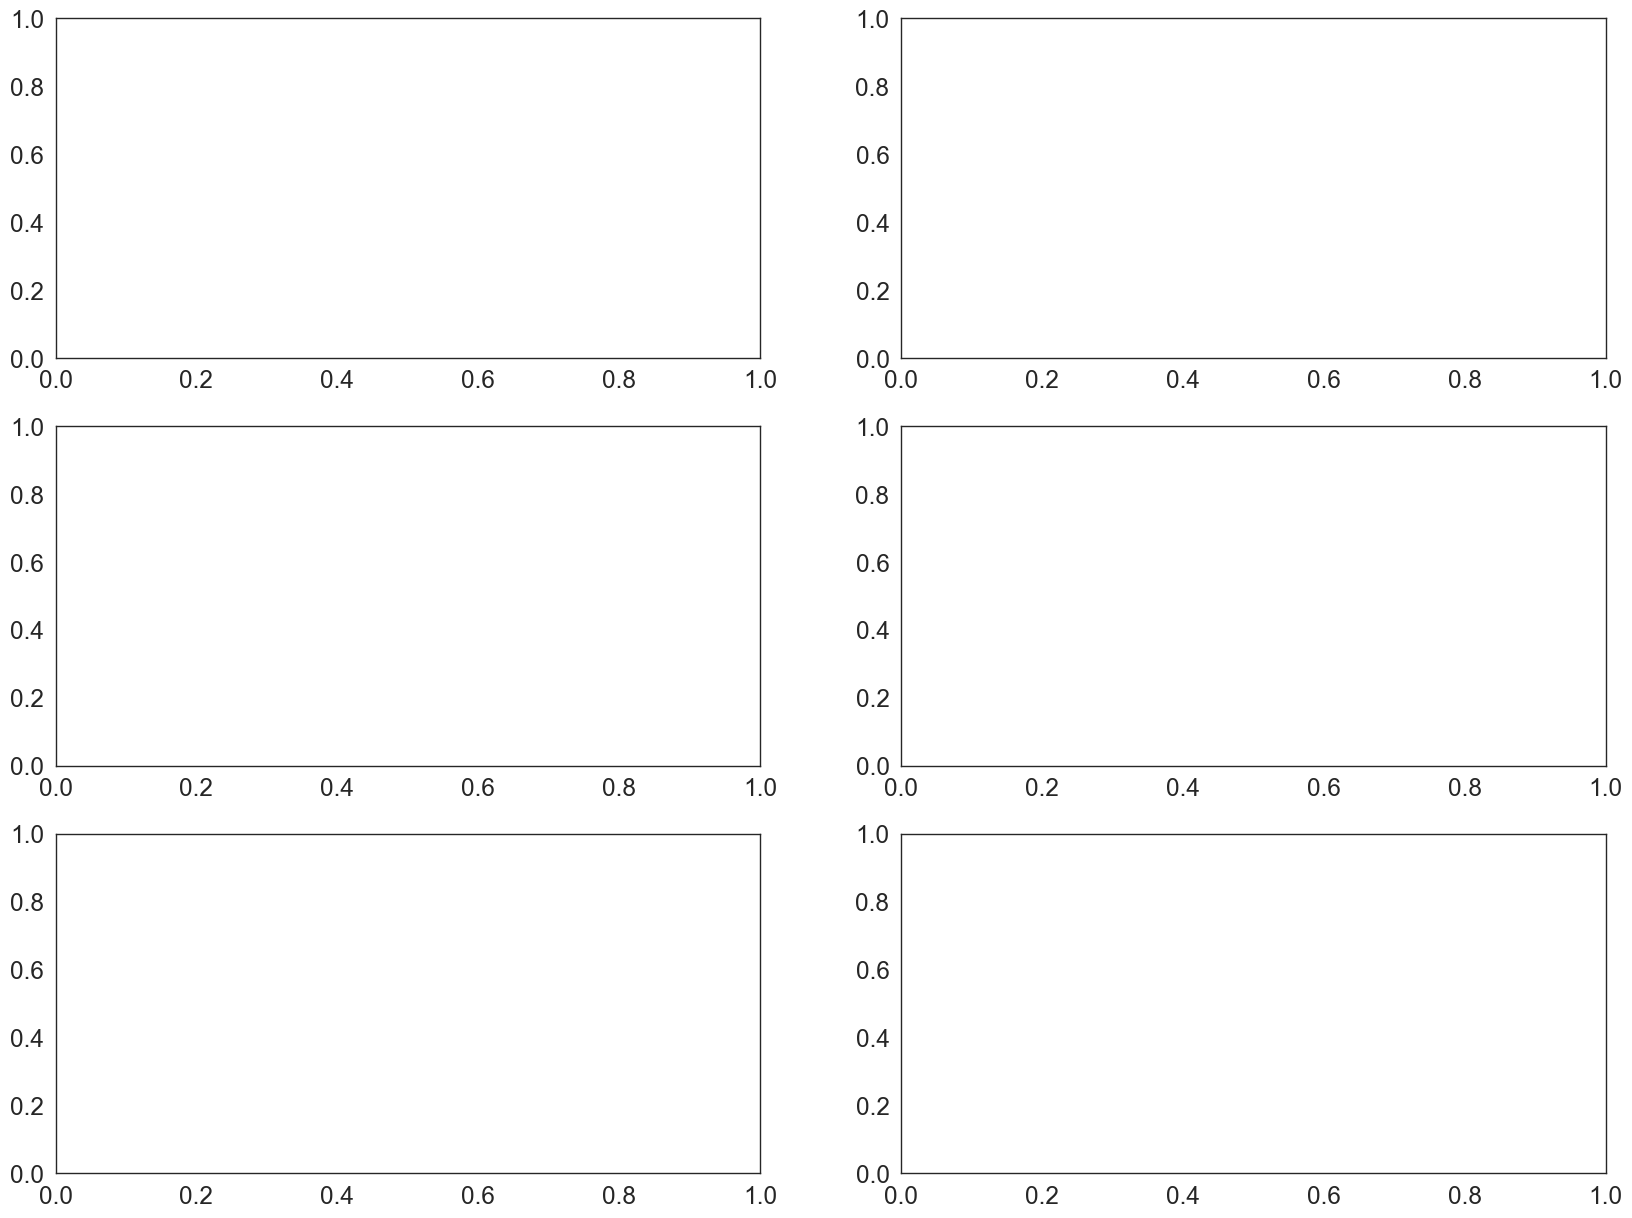

: 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def gauss(mu, sigma, x):
    """Compute the Gaussian filter at given x values."""
    normal = 1 / (2.0 * np.pi * sigma**2)
    gauss = np.exp(-((x - mu)**2 / (2.0 * sigma**2))) * normal
    return gauss

def compute_gaussians(df, probe_type, state, depths):
    """Compute the Gaussian filters for a specific probe type and state."""
    x = np.linspace(0, 100, 1000)
    ys = []

    for depth in depths:
        df_probe = df[df['Name of probe'] == probe_type]
        df_state = df_probe[df_probe['State'] == state]
        df_depth = df_state[df_state['Depth'] == depth]

        centr_frequencies = df_depth['Central frequencies']
        peak_powers = df_depth['Peak powers']
        band_widths = df_depth['Bandwidths']

        y = np.zeros_like(x)
        for cf, pp, bw in zip(centr_frequencies, peak_powers, band_widths):
            y_i = gauss(cf, bw, x)
            y_i = y_i * pp

            if np.isnan(y_i).any():
                continue
            y += y_i

        y = y / len(centr_frequencies)
        ys.append(y)

    return np.array(ys), depths

def plot_colormesh(probe_type, state, ys, depths, ax):
    """Plot the colormesh for a specific probe type and state."""
    ax.pcolormesh(np.linspace(0, 100, 1000), depths, ys, cmap='jet')
    # ax.colorbar()
    ax.set_title(f'{probe_type}, {state}')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Depth (um)')


graph_dict = defaultdict(list)

# Set GridSpec for the figure
fig = plt.figure(figsize=(20, 15))
gs = GridSpec(3, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0]) # ECoG, upstate
ax2 = fig.add_subplot(gs[0, 1]) # ECoG, downstate
ax3 = fig.add_subplot(gs[1, 0]) # Probe_1, upstate
ax4 = fig.add_subplot(gs[1, 1]) # Probe_1, downstate
ax5 = fig.add_subplot(gs[2, 0]) # Probe_2, upstate
ax6 = fig.add_subplot(gs[2, 1]) # Probe_2, downstate


# Iterate over all probe types
probe_types = df['Name of probe'].unique()

for probe_type in probe_types:
    # Take only df for current probe type
    df_probe = df[df['Name of probe'] == probe_type]
    # Iterate over all states
    states = df_probe['State'].unique()
    for state in states:
        # Take only df for current state
        df_state = df_probe[df_probe['State'] == state]

exit()
#         ys, depths = compute_gaussians(df_state, probe_type, state, depths)

#         if state == 'upstate' and probe_type == 'Probe_1':
#             plot_colormesh(probe_type, state, ys, depths, ax1)
        
#         if state == 'downstate' and probe_type == 'Probe_1':
#             plot_colormesh(probe_type, state, ys, depths, ax2)
        
#         if state == 'upstate' and probe_type == 'Probe_2':
#             plot_colormesh(probe_type, state, ys, depths, ax3)
        
#         if state == 'downstate' and probe_type == 'Probe_2':
#             plot_colormesh(probe_type, state, ys, depths, ax4)

#         if state == 'upstate' and probe_type == 'ECoG':
#             # Replace depth with channel index
#             upstate_channel = np.arange(0, 64)
#             print(ys.shape)
#             plot_colormesh(probe_type, state, ys, upstate_channel, ax5)
        
#         if state == 'downstate' and probe_type == 'ECoG':
#             # Replace depth with channel index
#             upstate_channel = np.arange(0, 64)
#             print(ys.shape)
#             plot_colormesh(probe_type, state, ys, upstate_channel, ax6)

# plt.tight_layout()
# plt.show()